# 1) Importing Libraries

In [ ]:
!pip install --upgrade kneed
!pip install xgboost
!pip install plotly
!pip install fuzzy-c-means
!pip install keras

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import loadtxt, mean, std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Visualization
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from seaborn import scatterplot as scatter
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
#Makes sure plotly graphs don't dissapear after reopening notebook
import plotly.io as pio
#just for google colab run with this notebook_connected
#pio.renderers.default='colab'
# In ipynb run with the below
pio.renderers.default='notebook'


#Feature Selection
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

#Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import decomposition
from kneed import KneeLocator
#Heirachical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
#Fuzzy clustering
from fcmeans import FCM
#For density based clustering
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

#Feature selection
from sklearn import feature_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

#Regression 
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import xgboost

#classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


#Others
import statsmodels.api as sm
import time

#Regression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 2) Functions

## 2.1) Get Training and Test Data

In [ ]:
#Takes in independant variable "Customer Lifetime Value"
#Use this for Regression
def get_train_test_clv(scaled_df):
    independant_variable = "Customer Lifetime Value"
    y = scaled_df[independant_variable]
    column_names = []
    for column in scaled_df.columns:
        if column!= independant_variable:
            column_names.append(column)
    x = scaled_df[column_names]
    x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.5, random_state=123)
    #Set random state to 123 to reproduce results
    return x_train, x_test, y_train, y_test


In [ ]:
#Takes in independant variable "Response"
#Use this for Classification
def get_train_test_response(scaled_df):
    independant_variable = "Response"
    y = scaled_df[independant_variable]
    column_names = []
    for column in scaled_df.columns:
        if column!= independant_variable:
            column_names.append(column)
    x = scaled_df[column_names]
    x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.5, random_state=123)
    #Set random state to 123 to reproduce results
    return x_train, x_test, y_train, y_test

## 2.2) Regression Models

In [ ]:
def linear_model(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    lr_model = linear_model.LinearRegression()
    lr_model.fit(x_train, y_train)
    y_prediction = lr_model.predict(x_test)
    r2 = metrics.r2_score(y_test, y_prediction)
    print(f"R**2 score of Linear regression model= {r2}")
    return r2

In [ ]:
def lasso_model(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    #feel free to change alpha here
    alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]
    lasso_list = [linear_model.Lasso(alpha = alpha[i], max_iter = 10000) for i in range(len(alpha))]
    lasso_r2_dict = {}
    for i in range(len(alpha)):
        lasso_model = lasso_list[i]
        lasso_model.fit(x_train, y_train)
        y_prediction = lasso_model.predict(x_test)
        r2_score = metrics.r2_score(y_test, y_prediction)
        lasso_r2_dict[alpha[i]]=[r2_score, lasso_model.coef_]
        print(f"R**2 score of Lasso regression model with alpha: {alpha[i]} = {r2_score}")
    return lasso_r2_dict

In [ ]:
def ridge_model(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    #feel free to change alpha here
    alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]
    ridge_list = [linear_model.Ridge(alpha = alpha[i], max_iter = 10000) for i in range(len(alpha))]
    ridge_r2_dict = {}
    for i in range(len(alpha)):
        ridge_model = ridge_list[i]
        ridge_model.fit(x_train, y_train)
        y_prediction = ridge_model.predict(x_test)
        r2_score = metrics.r2_score(y_test, y_prediction)
        ridge_r2_dict[alpha[i]]= [r2_score, ridge_model.coef_]
        print(f"R**2 score of Ridge regression model with alpha: {alpha[i]} = {r2_score}")
    return ridge_r2_dict

In [ ]:
def xgb_model(x_train, x_test, y_train, y_test):
  import xgboost
  xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,   
            booster = 'gbtree',
             learning_rate=0.1,
             max_depth=5,
             min_child_weight=1.5,
             n_estimators=100,   
             reg_lambda = 1,
             seed=42)
  xgb_model.fit(x_train, y_train)
  y_prediction = xgb_model.predict(data=x_test)
  r2_score = metrics.r2_score(y_test, y_prediction) 
  print(f"R**2 score of XGBoost model= {r2_score}")
  return r2_score

In [ ]:
def KNeighbors_model(x_train, x_test, y_train, y_test):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor()
  neigh.fit(x_train,y_train)
  y_prediction = neigh.predict(x_test)
  r2_score = metrics.r2_score(y_test, y_prediction)
  print(f"R**2 score of K Neighbors model = {r2_score}")
  return r2_score

In [ ]:
def decisiontree_model(x_train, x_test, y_train, y_test):
  from sklearn.tree import DecisionTreeRegressor
  dt_model = DecisionTreeRegressor()
  dt_model.fit(x_train, y_train)
  y_prediction = dt_model.predict(x_test)
  r2_score = metrics.r2_score(y_test, y_prediction)
  print(f"R**2 score of decision tree regression model = {r2_score}")
  return r2_score

## 2.3) Dataframe to R^2

In [ ]:
def df_to_linear_r2(df):
    x_train, x_test, y_train, y_test = get_train_test_clv(df)
    linear_r2 = linear_model(x_train, x_test, y_train, y_test)
    return linear_r2

def df_to_lasso_r2(df):
    x_train, x_test, y_train, y_test = get_train_test_clv(df)
    lasso_r2_dict = lasso_model(x_train, x_test, y_train, y_test)
    return lasso_r2_dict

def df_to_ridge_r2(df):
    x_train, x_test, y_train, y_test = get_train_test_clv(df)
    ridge_r2_dict = ridge_model(x_train, x_test, y_train, y_test)
    return ridge_r2_dict

def df_to_xgb_r2(df):
  x_train, x_test, y_train, y_test = get_train_test_clv(df)
  xgb_r2 = xgb_model(x_train, x_test, y_train, y_test)
  return xgb_r2


## 2.4) MinMax scale Dataset

In [ ]:
def standardize_df(df): 
  from sklearn.preprocessing import MinMaxScaler
  MinMaxScale = MinMaxScaler()
  df = pd.DataFrame(MinMaxScale.fit_transform(df) , columns = df.columns)
  df['Number of Policies'] =  df['Number of Policies']* 2
  return df

## 2.5) Transforming Dataset

In [ ]:
def quantile_df(df):
  from sklearn.preprocessing import QuantileTransformer
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  temp_df = original_df.select_dtypes(include=numerics)
  numeric_columns = temp_df.columns
  trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
  numeric_df = pd.DataFrame(trans.fit_transform(temp_df) , columns=numeric_columns)
  df.drop(numeric_columns, axis=1, inplace=True)
  df = pd.concat([df,numeric_df], axis = 1 )
  return df

## 2.6) Creating Graphs for Clusters

In [ ]:
def numberdistributiongraph(Attribute):
  observation = Attribute

  fig = px.box(original, x="Cluster", y=observation)
  fig.update_layout(
      title_text=( observation + " Distribution Chart"),
  )
  fig.show()
    
def categorydistributiongraph(Attribute):
  observation = Attribute

  data ={}
  for i in original[observation].unique():
      lister=[0, 0, 0, 0]
      count = 0
      for t in original[original[observation] == i].groupby("Cluster")[observation].agg(['count']).values:
          indexes = original[original[observation] == i].groupby("Cluster")[observation].agg(['count']).index.values
          lister[indexes[count]] = (t[0]/original.groupby("Cluster")[observation].agg(['count']).values[indexes[count]][0])*100
          count+=1
    
      data[i] = lister
        
  labels = [0,1,2,3]
  widths = np.array([20,20,20,20])


  fig = go.Figure()
  for key in data:
      fig.add_trace(go.Bar(
          name=key,
          y=data[key],
          x=np.cumsum(widths)-widths,
          width=widths,
          offset=0,
          customdata=np.transpose([labels, data[key]]),
          texttemplate="% %{y} ",
          textposition="inside",
          textangle=0,
          textfont_color="white",
          hovertemplate="<br>".join([
              "Cluster: %{customdata[0]}",
              "Percentage: %{y}",
          ])
      ))

  fig.update_xaxes( 
      tickvals=np.cumsum(widths)-widths/2, 
      ticktext= ["Cluster %s" % (l) for l in zip(labels)]
  )


  fig.update_layout(
      title_text=(observation + " Distribution Chart"),
      barmode="stack",
  )
  fig.show()


## 2.7) Plot ROC Graph 

In [ ]:
def makeROC(classifiers, title, rocX_train, rocX_test, rocy_train, rocy_test):
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

    # Train the models and record the results
    for cls in classifiers:
        model = cls.fit(rocX_train, rocy_train)
        yproba = model.predict_proba(rocX_test)[::,1]

        fpr, tpr, _ = roc_curve(rocy_test,  yproba)
        auc = roc_auc_score(rocy_test, yproba)

        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title(('ROC Curve Analysis '+title), fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
    

## 2.8) Regression Stacking

In [ ]:

# get a stacking ensemble of models : level 0 modelling of stacking 3 models 
def get_stacking(Best_KNN, Best_TreeR,Best_SVR):
    # define the base models
    level0 = list()
    level0.append(('knn', Best_KNN))
    level0.append(('DT Regressor', Best_TreeR))
    level0.append(('svr', Best_SVR))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models(Best_KNN,Best_Lasso, Best_Ridge, Best_SVR, Best_TreeR,Best_XGB):
    models = dict()
    models['KNN'] = Best_KNN
    models['Lasso'] = Best_Lasso
    models['Ridge'] = Best_Ridge
    models['SVR'] = Best_SVR
    models['DTR'] = Best_TreeR
    models['XGBoost'] = Best_XGB
    return models
 
# evaluate a given model using cross-validation : using repeated k fold and 10 split ways 
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return np.abs(scores)
 

# 3) Importing Dataset

In [ ]:
original_df = pd.read_csv("./sample_data/raw.csv")

# 4) EDA

In [ ]:
original_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 4.1) Dropping non-predictive values

In [ ]:
original_df.drop(['Customer'], inplace=True, axis='columns')
original_df.drop(['Policy Type'], inplace=True, axis='columns')
original_df.drop(['Effective To Date'], inplace=True, axis='columns')

## 4.2) Feature Engineering

Given contextual knowledge, our group combined these attributes together as they cannot be looked at independantly. For example, a medium sized sports car carries a higher value than a large SUV.

Looking at these attributes separately creates more noise and adds inaccuracy to our models

In [ ]:
original_df["Vehicle"] = original_df["Vehicle Class"] + " " + original_df["Vehicle Size"]
original_df.drop("Vehicle Class", axis = 1, inplace =True)
original_df.drop("Vehicle Size", axis = 1, inplace =True)

## 4.3) Univariate Analysis

Histogram for Numerical Variables


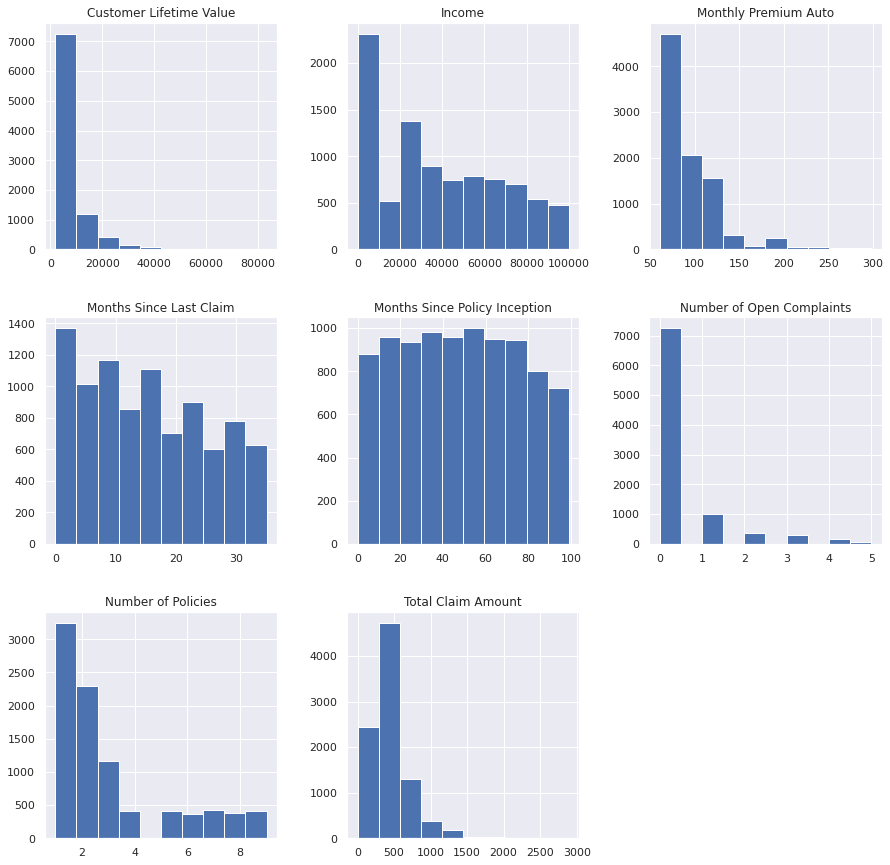

In [ ]:
print ("Histogram for Numerical Variables")
plots = original_df.hist(figsize=(15,15))

Looking at the numerical graphs, we can see the most of our data is **right-skewed** and **have large variance in range**. Hence, we will have to standardize and transform our dataset during pre-processing. 


Count Charts for Categorial Variables 


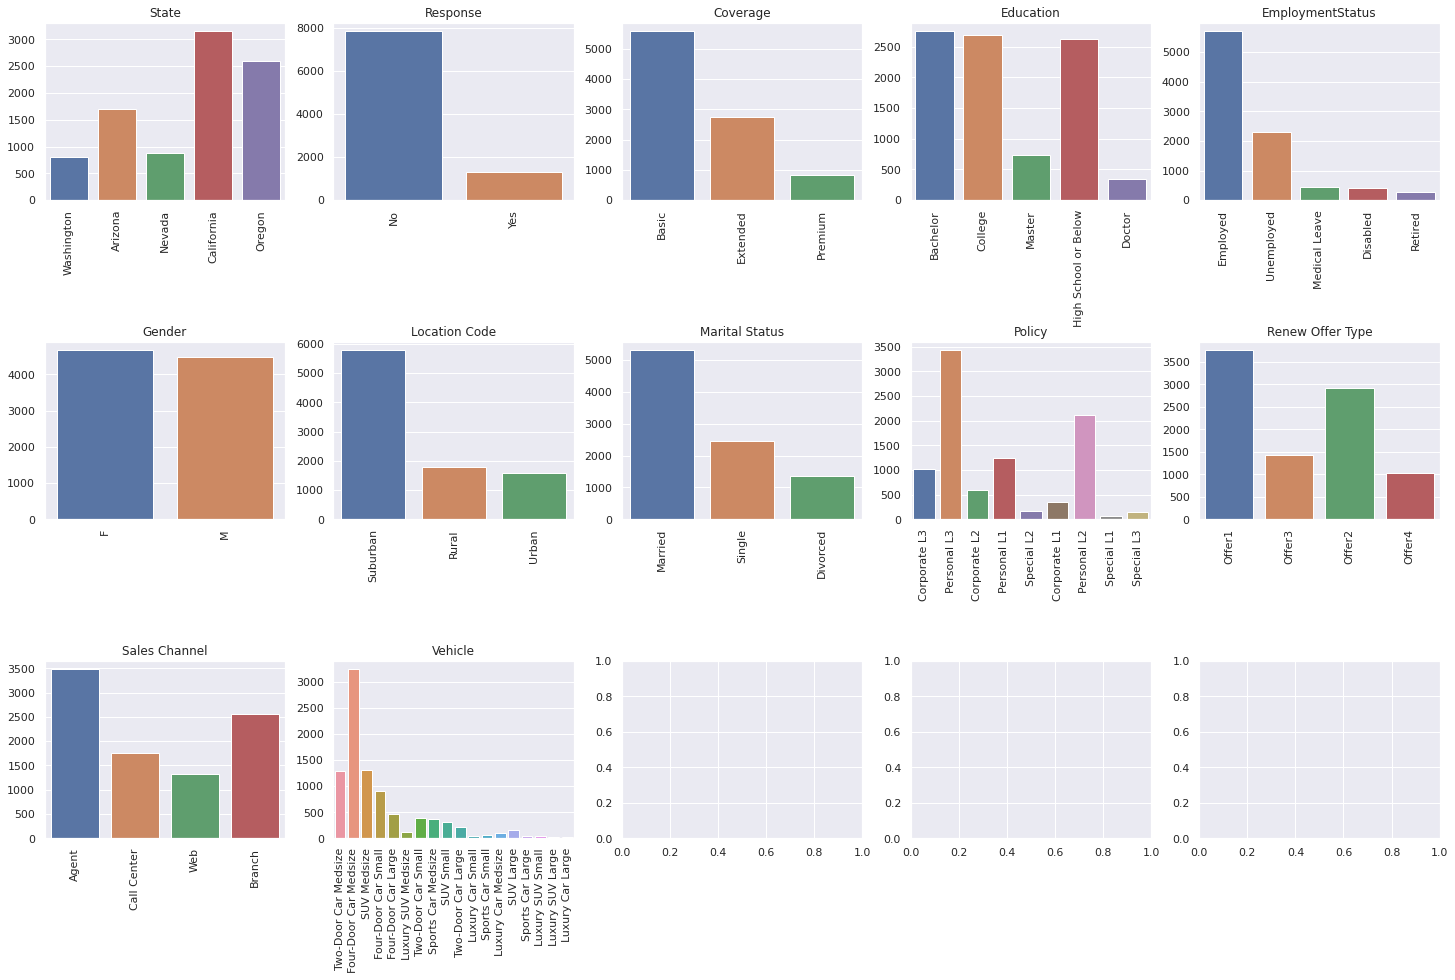

In [ ]:
print ("Count Charts for Categorial Variables ")
cat_features = [col for col in original_df.columns if original_df[col].dtype == "object"]
customer_labelled_df = original_df[cat_features]
# print(cat_features)

fig, ax = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace=0.8)
for variable, subplot in zip(cat_features, ax.flatten()):
    t = sns.countplot(x = customer_labelled_df[variable], ax=subplot)
    t.set(xlabel='' , ylabel='' , title = variable )
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## 4.4) Bi-variate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

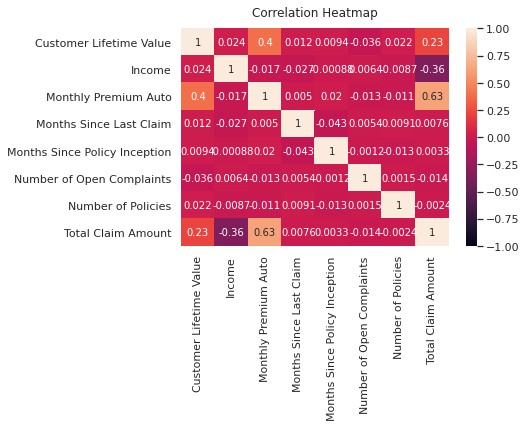

In [ ]:
corr_heatmap = sns.heatmap(original_df.corr(), vmin=-1, vmax=1, annot=True)
corr_heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':12}, pad=12)

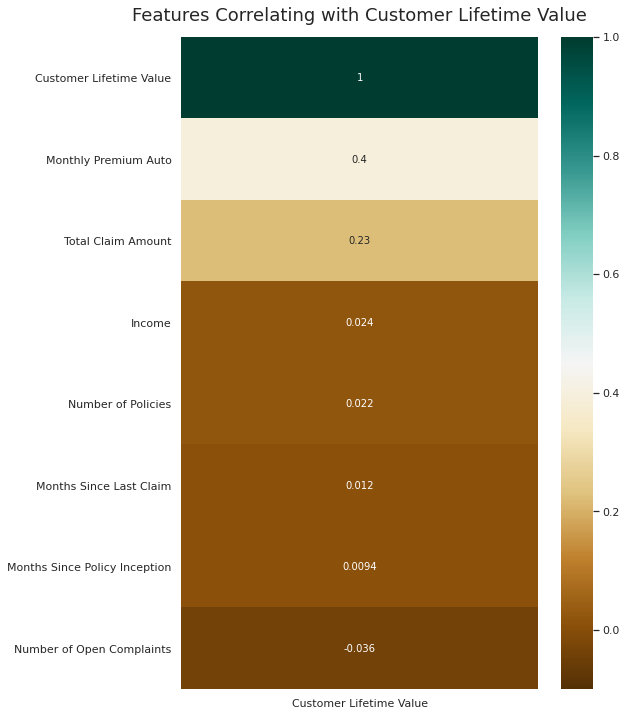

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(original_df.corr()[['Customer Lifetime Value']].sort_values(by='Customer Lifetime Value', ascending=False), vmin=-0.1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Customer Lifetime Value', fontdict={'fontsize':18}, pad=16);

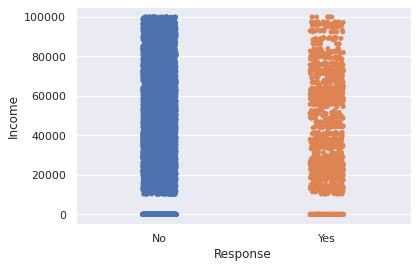

In [ ]:
sns.stripplot(x=original_df["Response"], y=original_df["Income"])

# 5) Pre-processing

## 5.1) Creating Numerical DataFrame

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
customer_numeric_df = original_df.select_dtypes(include=numerics)

customer_numeric_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## 5.2) Create Mix-Encoded DataFrame

In [ ]:
#Label encoded ordinal values

cleanup_coverage = {"Coverage":{"Basic": 0, "Extended": 1, "Premium": 2}}
customer_mixed_df = original_df.replace(cleanup_coverage)

cleanup_education = {"Education":{"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4}}
customer_mixed_df.replace(cleanup_education, inplace=True)

cleanup_policy = {"Policy":{"Special L1": 0, "Corporate L1": 0, "Personal L1": 0, "Special L2": 1, "Corporate L2": 1, "Personal L2": 1, "Special L3": 2, "Corporate L3": 2, "Personal L3": 2}}
customer_mixed_df.replace(cleanup_policy, inplace=True)

cleanup_location = {"Location Code":{"Rural":0, "Suburban":1, "Urban":2}}
customer_mixed_df.replace(cleanup_location, inplace=True)

cleanup_gender = {"Gender":{"M":0, "F":1}}
customer_mixed_df.replace(cleanup_gender, inplace=True)

cleanup_reponse = {"Response":{"No":0, "Yes":1}}
customer_mixed_df.replace(cleanup_reponse, inplace=True)

#Hot encode nominal values
nominal_categories =  [ 'EmploymentStatus', 'Vehicle', 'Marital Status', 'Sales Channel', 'State', 'Renew Offer Type']

for category in nominal_categories:
    nominal_column = customer_mixed_df.loc[:,[category]]
    dummy_columns = pd.get_dummies(nominal_column)
    customer_mixed_df.drop(category, axis=1, inplace=True)
    customer_mixed_df = customer_mixed_df.join(dummy_columns)

customer_mixed_df.head()

,Customer Lifetime Value,Response,Coverage,Education,Gender,Income,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Total Claim Amount,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Vehicle_Four-Door Car Large,Vehicle_Four-Door Car Medsize,Vehicle_Four-Door Car Small,Vehicle_Luxury Car Large,Vehicle_Luxury Car Medsize,Vehicle_Luxury Car Small,Vehicle_Luxury SUV Large,Vehicle_Luxury SUV Medsize,Vehicle_Luxury SUV Small,Vehicle_SUV Large,Vehicle_SUV Medsize,Vehicle_SUV Small,Vehicle_Sports Car Large,Vehicle_Sports Car Medsize,Vehicle_Sports Car Small,Vehicle_Two-Door Car Large,Vehicle_Two-Door Car Medsize,Vehicle_Two-Door Car Small,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4
0,2763.519279,0,0,2,1,56274,1,69,32,5,0,1,2,384.811147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0
1,6979.535903,0,1,2,1,0,1,94,13,42,0,8,2,1131.464935,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
2,12887.431650,0,2,2,1,48767,1,108,18,38,0,2,2,566.472247,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,7645.861827,0,0,2,0,0,1,106,18,65,0,7,1,529.881344,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,2813.692575,0,0,2,0,43836,0,73,12,44,0,1,0,138.130879,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0


## 5.3) Creating Label-Encoded DataFrame

In [ ]:
cleanup_coverage = {"Coverage":{"Basic": 0, "Extended": 1, "Premium": 2}}
customer_labelled_df = original_df.replace(cleanup_coverage)

cleanup_education = {"Education":{"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4}}
customer_labelled_df.replace(cleanup_education, inplace=True)

cleanup_policy = {"Policy":{"Special L1": 0, "Corporate L1": 0, "Personal L1": 0, "Special L2": 1, "Corporate L2": 1, "Personal L2": 1, "Special L3": 2, "Corporate L3": 2, "Personal L3": 2}}
customer_labelled_df.replace(cleanup_policy, inplace=True)

cleanup_location = {"Location Code":{"Rural":0, "Suburban":1, "Urban":2}}
customer_labelled_df.replace(cleanup_location, inplace=True)

cleanup_gender = {"Gender":{"M":0, "F":1}}
customer_labelled_df.replace(cleanup_gender, inplace=True)

cleanup_reponse = {"Response":{"No":0, "Yes":1}}
customer_labelled_df.replace(cleanup_reponse, inplace=True)

nominal_categories =  [ 'EmploymentStatus', 'Vehicle', 'Marital Status', 'Sales Channel', 'State', 'Renew Offer Type']

for column in nominal_categories:
    if customer_labelled_df[column].dtype == type(object):
        le = LabelEncoder()
        customer_labelled_df[column] = le.fit_transform(customer_labelled_df[column])
       

customer_labelled_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle
0,4,2763.519279,0,0,2,1,1,56274,1,1,69,32,5,0,1,2,0,0,384.811147,16
1,0,6979.535903,0,1,2,4,1,0,1,2,94,13,42,0,8,2,2,0,1131.464935,1
2,2,12887.431650,0,2,2,1,1,48767,1,1,108,18,38,0,2,2,0,0,566.472247,16
3,1,7645.861827,0,0,2,4,0,0,1,1,106,18,65,0,7,1,0,2,529.881344,10
4,4,2813.692575,0,0,2,1,0,43836,0,2,73,12,44,0,1,0,0,0,138.130879,1


## 5.4) Transforming and Scaling Datasets

In [ ]:
customer_numeric_df = standardize_df(customer_numeric_df)
customer_mixed_df = standardize_df(customer_mixed_df)
customer_labelled_df = standardize_df(customer_labelled_df)

In [ ]:
customer_numeric_df = quantile_df(customer_numeric_df)
customer_mixed_df = quantile_df(customer_mixed_df)
customer_labelled_df = quantile_df(customer_labelled_df)

## 5.6) Comparing Datasets

In [ ]:
linearnum = df_to_linear_r2(customer_numeric_df)
linearmix = df_to_linear_r2(customer_mixed_df)
linearlabel = df_to_linear_r2(customer_labelled_df)

R**2 score of Linear regression model= 0.5817513461589318
R**2 score of Linear regression model= 0.6279835898093988
R**2 score of Linear regression model= 0.5890733972419704


In [ ]:
print ("*" * 10, "NUMERICAL VALUES ONLY VS MIXED-ENCODING", "*" * 10)
print(f"Linear: {linearnum-linearmix}\n")
print ("\n" ,"*" * 10, "NUMERICAL VALUES ONLY VS LABEL-ENCODING", "*"*10)
print(f"Linear: {linearnum-linearlabel}\n")
print ("\n" ,"*" * 10, "LABEL-ENCODING VS MIXED-ENCODING", "*" * 10)
print(f"Linear: {linearlabel-linearmix}\n")

********** NUMERICAL VALUES ONLY VS MIXED-ENCODING **********
Linear: -0.046232243650467075


 ********** NUMERICAL VALUES ONLY VS LABEL-ENCODING **********
Linear: -0.007322051083038628


 ********** LABEL-ENCODING VS MIXED-ENCODING **********
Linear: -0.03891019256742845



In [ ]:
Y = customer_numeric_df['Customer Lifetime Value']
X = customer_numeric_df.drop('Customer Lifetime Value', axis=1)

regressor_OLS = sm.OLS(endog = Y, exog = X).fit() 
print ()
print (regressor_OLS.summary() )

Y = customer_mixed_df['Customer Lifetime Value']
X = customer_mixed_df.drop('Customer Lifetime Value', axis=1)

regressor_OLS = sm.OLS(endog = Y, exog = X).fit() 
print ()
print (regressor_OLS.summary() )

Y = customer_labelled_df['Customer Lifetime Value']
X = customer_labelled_df.drop('Customer Lifetime Value', axis=1)

regressor_OLS = sm.OLS(endog = Y, exog = X).fit() 
print ()
print (regressor_OLS.summary() )


                                   OLS Regression Results                                   
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.555
Model:                                 OLS   Adj. R-squared (uncentered):              0.554
Method:                      Least Squares   F-statistic:                              1623.
Date:                     Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                             09:56:24   Log-Likelihood:                         -9172.9
No. Observations:                     9134   AIC:                                  1.836e+04
Df Residuals:                         9127   BIC:                                  1.841e+04
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
                                    coef    std err          t      P

**R^2 Evaluation - Difference between the DataFrames**

|Models|Regression|
|-|-|
|Numerical vs Mix-Encoding|-0.04634131172306721|
|Numerical vs Label-Encoding|-0.003427299396667305|
|Label-Encoding vs Mix-Encoding|-0.04291401232639991|


**OLS Statistics**

||R^2|Adjusted R^2|Remarks|
|-|-|-|-|
|Numerical|0.555|0.554|1) Standard Errors assume that the covariance matrix of the errors is correctly specified.|
|Mix-Encoding|0.628|0.626|1) Standard Errors assume that the covariance matrix of the errors is correctly specified.<br><br>2) The smallest eigenvalue is 2.14e-27. This might indicate that there are strong multicollinearity<br> problems or that the design matrix is singular.
|Label-Encoding|0.587|0.587|1) Standard Errors assume that the covariance matrix of the errors is correctly specified.|




We applied a simple Linear Regression Model on the 3 Data Frame created above - <i>customer_numeric_df, customer_mixed_df, customer_labelled_df</i>. This is to understand which DataFrame can provide us with the <b>greatest explainability</b> of Customer Lifetime Value and <b>best classification results</b> of Response.

From the Table 1, we can see that perfoming Mix-Encoding produces results in a  higher r\*\*2 value, followed by Label-Encoding, followed by removing all categorical values (use of Numerical Values only). This Suggests that the categorical values does explain the variability of our target value, <i>Customer Lifetime Value</i> and we should keep them in our Dataset used. 
<br><br>

From Table 2, we can see that there is strong multicolinearity present or that the design matrix is singluar in the Mix-Encoded DataFrame. In our case, our DataFrame is a singular matrix due to the fact that we one-hot encoded our values. As such, we were thrown with such warning. Nonetheless, as we take a look at the predicted r^2 values and predicted adjusted r^2 values for all 3 DataFrames, we can see that the **decrease in r^2 values isn't significant for all our DataFrames**. Hence, we do not need to worry about multi-colinearity issues when doing regression. 

In Conclusion, Categorical Values from the data set explains the variance in <b><i>Customer Lifetime Value (Target)</i></b> and Categorical variables should be used as part of our DataFrame. Since the Mix-Encoded DataFrame produces the highest r^2 results, we will proceed our analysis with the <i><b>Mix-Encoded Model</b></i>


# 6) Clustering

## 6.1)Exploring Other Clustering Models

### Heirarchical Clustering

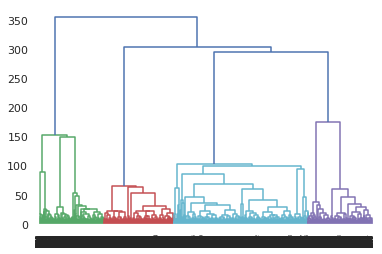

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(customer_mixed_df, method='ward'))

In [ ]:
#To get label of the heiracical clustering
for i in range(2,6):
    print("For Number of Clusters = ", i)
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    model.fit(X)
    labels = model.labels_
    print("Silhouette Score: ", silhouette_score(customer_mixed_df, labels, metric='euclidean'))
    print()

For Number of Clusters =  2
Silhouette Score:  0.2790545058186349

For Number of Clusters =  3
Silhouette Score:  0.2525574529349919

For Number of Clusters =  4
Silhouette Score:  0.2699389297763178

For Number of Clusters =  5
Silhouette Score:  0.2738184041203644



Number of optimal clusters for heirachical clustering is 5. Silhouette score is maximized at cluster = 5. This means the average inter cluster distance between each point to the next nearest cluster is maximized and the intra cluster distance is minimized. However, heirachical clustering is sensitive to outliers and is not suitable for large datasets, as in the case of our dataset, therefore we will not be implementing this model for clustering. 

### Optics Clustering

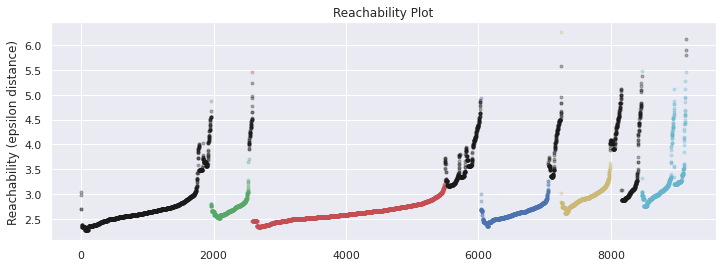

In [ ]:

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(customer_mixed_df)

space = np.arange(len(customer_mixed_df))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.', 'm.']
for klass, color in zip(range(0, 6), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

plt.tight_layout()
plt.show()

All data points are above the grey line are considered "noise" in the data. As a result it does not seem like density based clustering models such as optics and DBScan will not be very effective in clustering for the current data distribution of our attributes. 

### Fuzzy Clustering

For Number of Clusters =  2
Silhouette Score:  0.2627245733909714


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



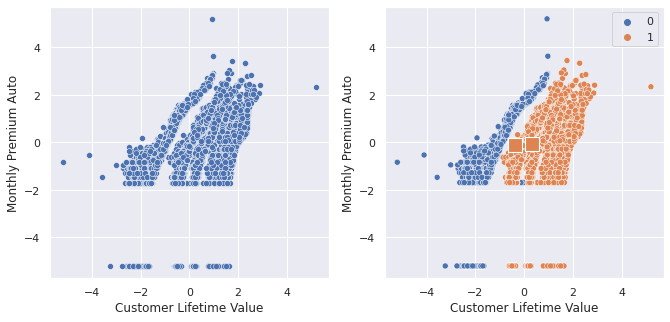


For Number of Clusters =  3
Silhouette Score:  0.25013748419918397


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



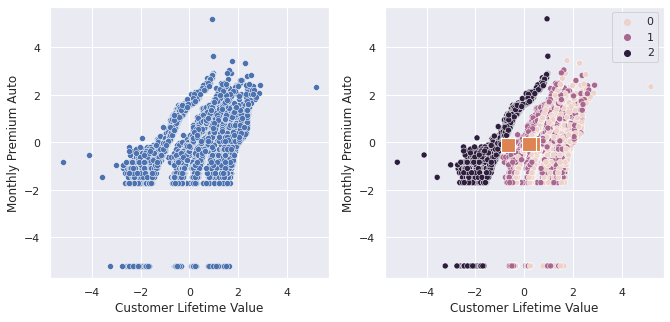


For Number of Clusters =  4
Silhouette Score:  0.2838400964059531


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



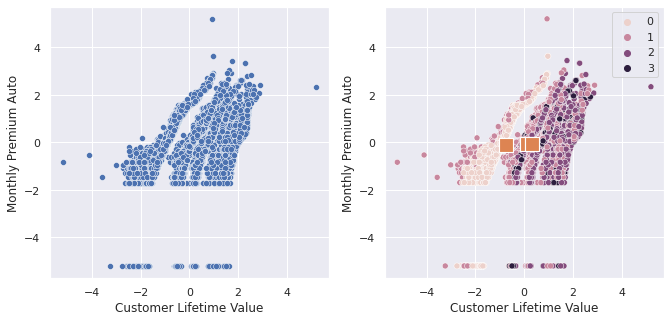


For Number of Clusters =  5
Silhouette Score:  0.15447756539876845


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



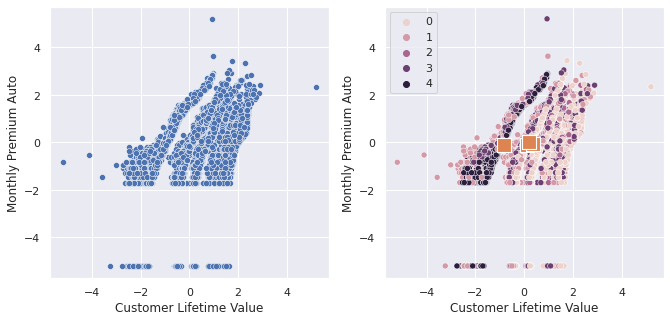

In [ ]:

X = customer_mixed_df
for i in range(2,6):
    # fit the fuzzy-c-means
    print("For Number of Clusters = ", i)
    fcm = FCM(n_clusters=i)
    fcm.fit(X)

    # outputs
    fcm_centers = fcm.centers
    fcm_labels  = fcm.u.argmax(axis=1)
    print("Silhouette Score: ", silhouette_score(customer_mixed_df, fcm_labels, metric='euclidean'))

    # plot result
    %matplotlib inline
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    scatter(X.iloc[:,45], X.iloc[:,47], ax=axes[0])
    scatter(X.iloc[:,45], X.iloc[:,47], ax=axes[1], hue=fcm_labels)
    scatter(fcm_centers.iloc[:,45], fcm_centers.iloc[:,47], ax=axes[1],marker="s",s=200)
    plt.show()
    print()

While the performance of fuzzy clustering is comparable to K-kmeans, the complexity and computational overhead needed may be excessive as data accumulates over time within the company. Therefore, we shall consider k-means clustering instead as it requires less computational power while still having a greater silhouette coefficient score. 

## 6.2)KMeans Clustering

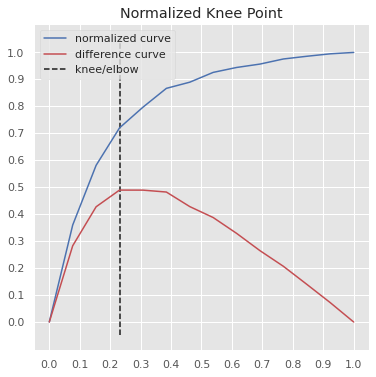

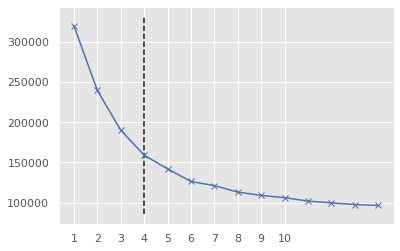

For n_clusters = 2 The average silhouette_score is : 0.26276491495632814
The davies boulin score is : 1.5704850335082534
For n_clusters = 3 The average silhouette_score is : 0.29001566948015717
The davies boulin score is : 1.3368938357896958
For n_clusters = 4 The average silhouette_score is : 0.29688939747195264
The davies boulin score is : 1.1952863386189048
For n_clusters = 5 The average silhouette_score is : 0.3171491869846278
The davies boulin score is : 1.1905983625507528
For n_clusters = 6 The average silhouette_score is : 0.33610782348078594
The davies boulin score is : 1.1959251218814304


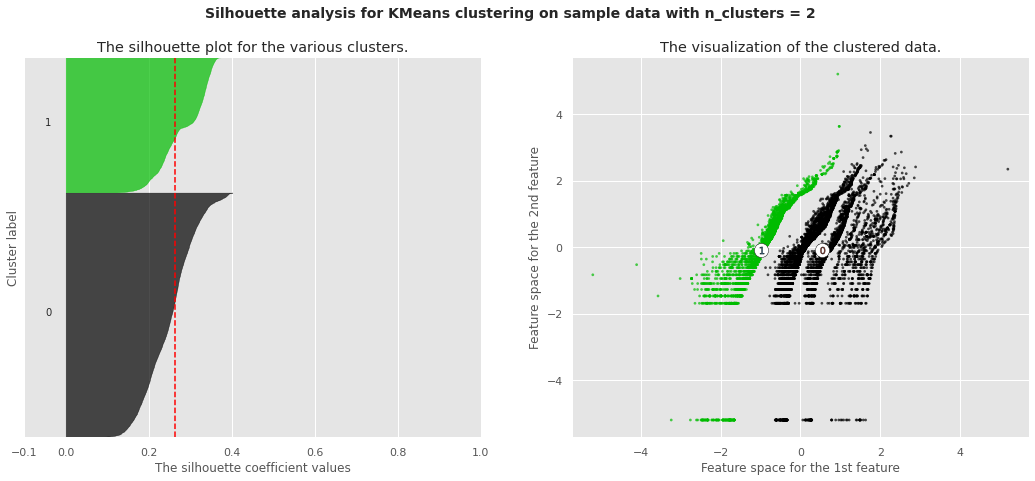

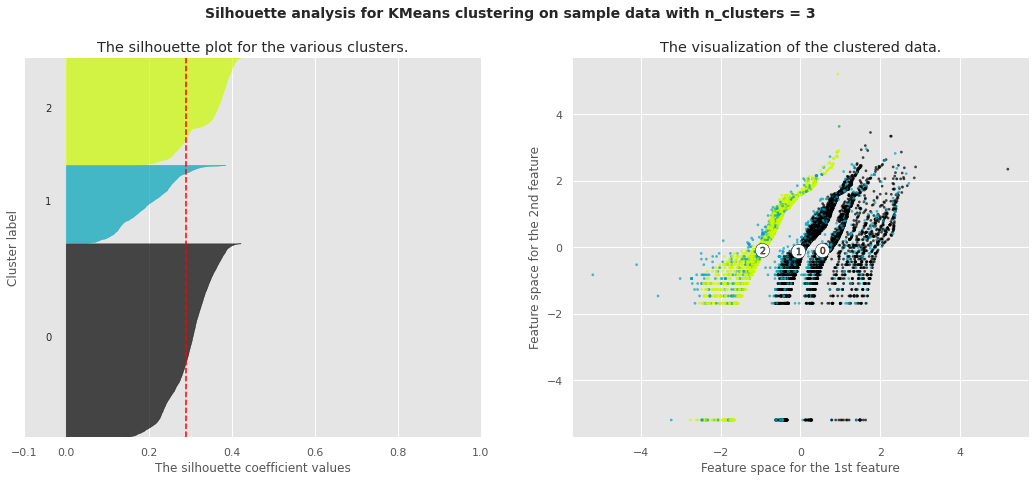

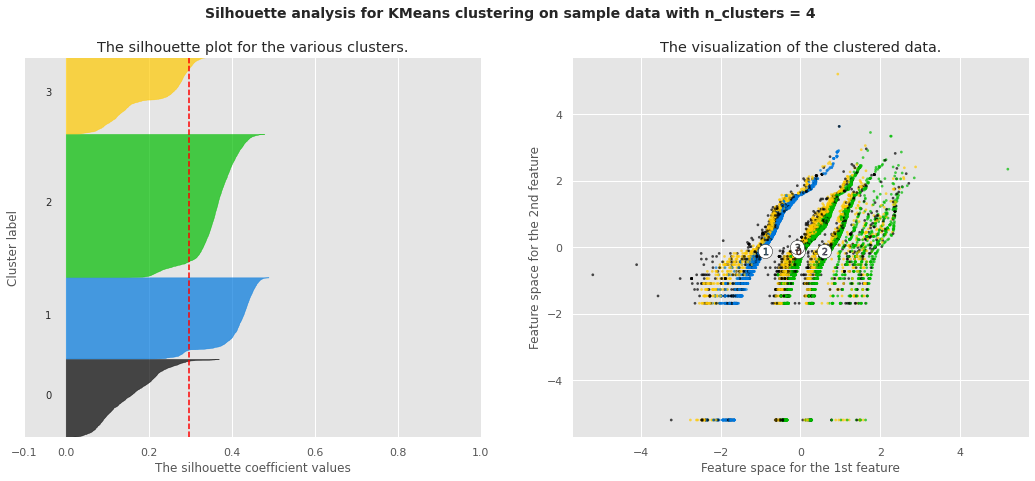

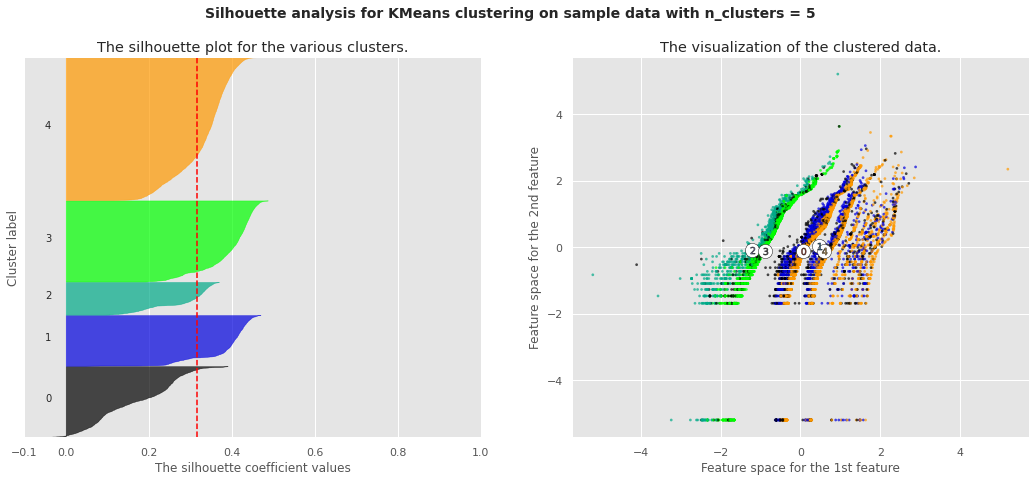

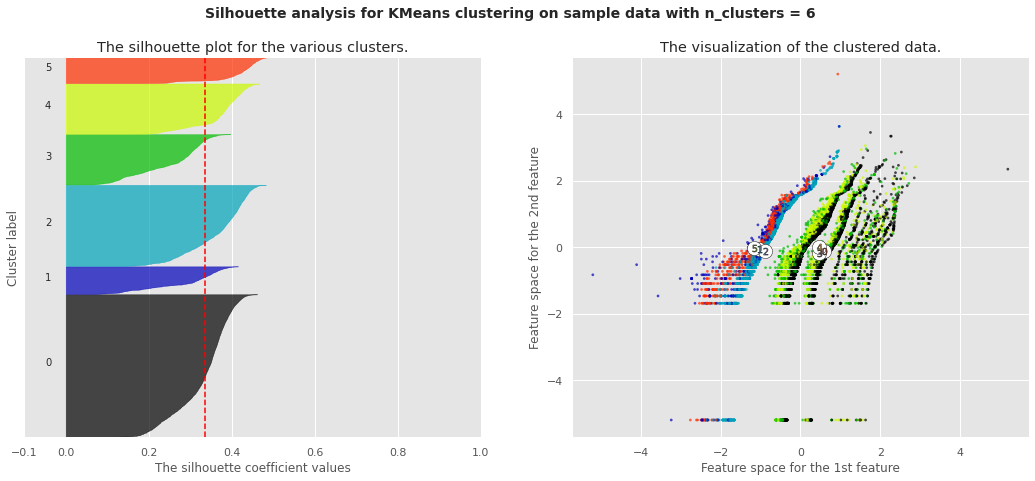

In [ ]:
X=customer_mixed_df

count = 0
xaxis=0
yaxis=1
for i in X.columns:
  if i == "Customer Lifetime Value":
    xaxis = count
  if i == "Monthly Premium Auto":
    yaxis = count
  count+=1
  
differentclusterlabels = []
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    labels = km.predict(X)
    centroids = km.cluster_centers_

kn = KneeLocator(
    K,
    Sum_of_squared_distances,
    curve='convex',
    direction='decreasing',
    interp_method='interp1d',
)

plt.style.use('ggplot')
kn.plot_knee_normalized()
plt.show()

plt.xticks(range(1,11))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    #Placing the various k cluster labels into a single list
    differentclusterlabels.append(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    print("The davies boulin score is :", davies_bouldin_score(X, cluster_labels))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X["Customer Lifetime Value"], X["Monthly Premium Auto"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, xaxis], centers[:, yaxis], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[xaxis], c[yaxis], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



From utilizing K-means clustering we have identified the optimal K as well as the knee locator library on python we have identified the **optimal number of clusters to be 4**. As observed by the red difference curve, the second derivative of sum of squared errors(SSE) is at its peak near the 4th data point. Because the SSE method does not consider the separation and cohesion of data points against other clusters, we utilize a second measure to ensure we maximize the inter cluster distance and minimize the intra cluster distance. Utilizing the silhouette score we identify that the higher the number of clusters the more optimized the inter and intra distance between clusters are. An additional factor to take into consideration is to prevent having an excessive amount of clusters that result in lesser data points and poorly fitted models. Therefore, we have decided to settle on 4 clusters as it provides a decent level of inter and intra cluster distance, while presenting the biggest change in SSE.  


## 6.3) Attatching Cluster label to dataframes

In [ ]:
original = original_df.copy()
original["Cluster"] = differentclusterlabels[2]
customer_mixed_df["Cluster"] = differentclusterlabels[2]

Our group is adding the cluster to both our original DataFrame to better understand the clusters based on the pre-processed values. 

## 6.4) Understanding the clusters

In [ ]:
original.groupby('Cluster').describe()

Customer Lifetime Value                ... Total Claim Amount             
                          count          mean  ...                75%          max
Cluster                                        ...                                
0                        1882.0   7797.318750  ...              528.0  2893.239678
1                        1960.0   3697.957956  ...              513.6  2069.309854
2                        3450.0  10689.770690  ...              494.4  2552.343856
3                        1842.0   7771.371300  ...              741.6  2759.794354

[4 rows x 64 columns]

In [ ]:
num_features = (customer_numeric_df.columns)

for n in num_features:
  numberdistributiongraph(n)

In [ ]:
cat_features = [col for col in original_df.columns if original_df[col].dtype == "object"]
for c in cat_features: 
  categorydistributiongraph(c)

Based on the above graphs, we can conclude certain characteristics for the different clusters.

Cluster 1:
*   Number of complains: More than 0

Cluster 2: 
*   Marital Status: Married
*   EmploymentStatus: Employed
*   Number of Policies: 0 
*   No open complains

Cluster 3:
*   Marital Status: Married
*   EmploymentStatus: Employed
*   No open complains

Cluster 4: 
*   Maximum Education: High School or Below
*   Marital Status: Single
*   Location Code: Suburban
*   EmploymentStatus: Unemployed
*   Income: 0
*   No open complains
*   Owns luxury cars



# 7) Classification

## 7.1) Running Classification Models without feature Selection

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_response(customer_mixed_df)

def getclassificationprediction(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("f1 score:  %.2f%%" % (f1_score(y_test, y_pred)*100))
    print("precision score: %.2f%%" % (precision_score(y_test, y_pred)*100))
    print("recall score:  %.2f%%" % (recall_score(y_test, y_pred)*100))
    print()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("*"*40)
print("Gaussian Naives Bayes")
getclassificationprediction(gnb)

LR = LogisticRegression()
LR.fit(X_train, y_train)
print("*"*40)
print("Logistic Regression")
getclassificationprediction(LR)

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
print("*"*40)
print("Stochastic Gradient Descent")
getclassificationprediction(SGD)

print("*"*40)
print("Neural Network")
NN = keras.Sequential()
NN.add(Flatten())
NN.add(Dense(512, activation="relu"))
NN.add(Dropout(0.1))
NN.add(Dense(128, activation="relu"))
NN.add(Dropout(0.1))
NN.add(Dense(2, activation="softmax"))

NN.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NN.fit(X_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(X_test, y_test))
score = NN.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
print("*"*40)
print("XGBoost Classifier")
getclassificationprediction(XGB)

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print("*"*40)
print("Random Forest Classifier")
getclassificationprediction(RFC)

ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)
print("*"*40)
print("ADA Boost")
getclassificationprediction(ADA)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("*"*40)
print("K Nearest Neighbour")
getclassificationprediction(knn)



****************************************
Gaussian Naives Bayes
Accuracy: 28.73%
f1 score:  27.81%
precision score: 16.18%
recall score:  98.74%

****************************************
Logistic Regression
Accuracy: 87.72%
f1 score:  28.35%
precision score: 75.00%
recall score:  17.48%



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



****************************************
Stochastic Gradient Descent
Accuracy: 83.91%
f1 score:  32.13%
precision score: 38.84%
recall score:  27.40%

****************************************
Neural Network
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

46/46 [==============================] - 0s 10ms/step - loss: 0.4257 - accuracy: 0.8388 - val_loss: 0.3617 - val_accuracy: 0.8610
Epoch 2/10
46/46 [==============================] - 0s 6ms/step - loss: 0.3520 - accuracy: 0.8555 - val_loss: 0.3164 - val_accuracy: 0.8706
Epoch 3/10
46/46 [==

## 7.2) Feature Selection

In [ ]:
#Feature selection using Decision Tree
clf = ExtraTreesClassifier(criterion="gini")
clf = clf.fit(X_train, y_train)
#Feature importance values uncomment below
# print(clf.feature_importances_)
modelDF = SelectFromModel(clf, prefit=True)
X_train = modelDF.transform(X_train)
X_test = modelDF.transform(X_test)

feat_labels = customer_mixed_df.loc[:, customer_mixed_df.columns != 'Response'].columns
print("----------Important Features Selected for Classification-------------")
for feature_list_index in modelDF.get_support(indices=True):
    print('-', feat_labels[feature_list_index])

----------Important Features Selected for Classification-------------
- Coverage
- Education
- Gender
- Location Code
- EmploymentStatus_Retired
- Vehicle_Four-Door Car Medsize
- Vehicle_SUV Medsize
- Marital Status_Married
- Sales Channel_Agent
- Renew Offer Type_Offer2
- Customer Lifetime Value
- Income
- Monthly Premium Auto
- Months Since Last Claim
- Months Since Policy Inception
- Number of Policies
- Total Claim Amount
- Cluster


## 7.3) Grid search for parameter optimization

### 7.3.1 )Random Forest

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [20, 23, 25, 27, 30],
    'n_estimators': [70,80,85,90,100]
}

# Create a base model
rf = RandomForestClassifier(random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

predictions = best_grid.predict(X_test)
errors = abs(predictions - y_test)
print('Model Performance')
print("Mean score across Cross validations: ", grid_search.best_score_)
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   28.3s finished


{'max_depth': 25, 'n_estimators': 70}
Model Performance
Mean score across Cross validations:  0.9798556748055584
Average Error: 0.0066 degrees.


### 7.3.2) XGBoost Classifier 

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,17,20,23,25],
    'n_estimators': [150, 200, 250],
    'reg_alpha': [0.01,0.1,0,1,10]
}

# Create a base model
XGB = XGBClassifier(random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = XGB, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

predictions = best_grid.predict(X_test)
errors = abs(predictions - y_test)
print('Model Performance')
print("Mean score across Cross validations: ", grid_search.best_score_)
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.6min finished


{'max_depth': 17, 'n_estimators': 250, 'reg_alpha': 0.1}
Model Performance
Mean score across Cross validations:  0.9761330787467045
Average Error: 0.0090 degrees.


### 7.3.3) ADA Boost Classifier

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1200,1300,1400],
    'base_estimator': [DecisionTreeClassifier(random_state=0, max_depth=1), DecisionTreeClassifier(random_state=0, max_depth=2)]
}

# Create a base model
ADA = AdaBoostClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ADA, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

predictions = best_grid.predict(X_test)
errors = abs(predictions - y_test)
print('Model Performance')
print("Mean score across Cross validations: ", grid_search.best_score_)
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.9min finished


{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), 'n_estimators': 1400}
Model Performance
Mean score across Cross validations:  0.9564277803134821
Average Error: 0.0177 degrees.


## 7.4) Running Classification Models with feature Selection and optimized parameters

In [ ]:
def getclassificationprediction(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("f1 score:  %.2f%%" % (f1_score(y_test, y_pred)*100))
    print("precision score: %.2f%%" % (precision_score(y_test, y_pred)*100))
    print("recall score:  %.2f%%" % (recall_score(y_test, y_pred)*100))
    print()

gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
print("*"*40)
print("Gaussian Naives Bayes")
getclassificationprediction(gnb2)

LR2 = LogisticRegression(penalty="l1", solver="saga", max_iter=130)
LR2.fit(X_train, y_train)
print("*"*40)
print("Logistic Regression")
getclassificationprediction(LR2)

SGD2 = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=0.0001)
SGD2.fit(X_train, y_train)
print("*"*40)
print("Stochastic Gradient Descent")
getclassificationprediction(SGD2)

print("*"*40)
print("Neural Network")
NN2 = keras.Sequential()
NN2.add(Flatten())
NN2.add(Dense(512, activation="relu"))
NN2.add(Dropout(0.1))
NN2.add(Dense(128, activation="relu"))
NN2.add(Dropout(0.1))
NN2.add(Dense(2, activation="softmax"))

NN2.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NN2.fit(X_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(X_test, y_test))
score = NN2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

XGB2 = XGBClassifier(n_estimators = 250, max_depth=17, reg_alpha=0.1)
XGB2.fit(X_train, y_train)
print("*"*40)
print("XGBoost Classifier")
getclassificationprediction(XGB2)

RFC2 = RandomForestClassifier(max_depth=20, random_state=0, n_estimators = 90, criterion="gini")
RFC2.fit(X_train, y_train)
print("*"*40)
print("Random Forest Classifier")
getclassificationprediction(RFC2)

ADA2 = AdaBoostClassifier(n_estimators=1400, base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2))
ADA2.fit(X_train, y_train)
print("*"*40)
print("ADA Boost")
getclassificationprediction(ADA2)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
print("*"*40)
print("K Nearest Neighbour")
getclassificationprediction(knn2)




****************************************
Gaussian Naives Bayes
Accuracy: 87.74%
f1 score:  28.75%
precision score: 74.83%
recall score:  17.80%

****************************************
Logistic Regression
Accuracy: 87.72%
f1 score:  28.35%
precision score: 75.00%
recall score:  17.48%

****************************************
Stochastic Gradient Descent
Accuracy: 87.74%
f1 score:  28.75%
precision score: 74.83%
recall score:  17.80%

****************************************
Neural Network
Epoch 1/10
46/46 [==============================] - 0s 8ms/step - loss: 0.4226 - accuracy: 0.8469 - val_loss: 0.3752 - val_accuracy: 0.8610
Epoch 2/10
46/46 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.8553 - val_loss: 0.3389 - val_accuracy: 0.8695
Epoch 3/10
46/46 [==============================] - 0s 5ms/step - loss: 0.3495 - accuracy: 0.8605 - val_loss: 0.3234 - val_accuracy: 0.8783
Epoch 4/10
46/46 [==============================] - 0s 6ms/step - loss: 0.3270 - accu

## 7.5) Compare Performance of Classification Models


************************************
Without feature Selection


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



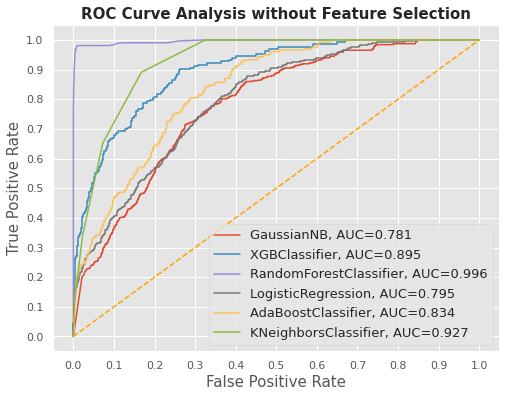

With feature selection


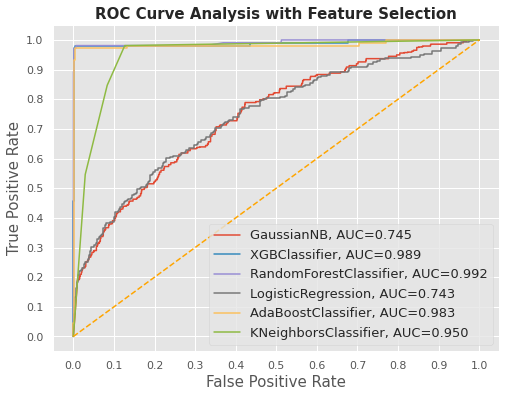

In [ ]:

print()
print("*"*36)

oX_train, oX_test, oy_train, oy_test = get_train_test_response(customer_mixed_df)

print("Without feature Selection")    
makeROC([gnb, XGB, RFC, LR, ADA, knn],"without Feature Selection",oX_train, oX_test, oy_train, oy_test)


print("With feature selection")
makeROC([gnb2, XGB2, RFC2, LR2, ADA2, knn2],"with Feature Selection",X_train, X_test, y_train, y_test)




**Classification Model Summary - Without Feature Selection**

||Accuracy (%)|F1 Score (%)|Precision (%)|Recall (%)|AUC|
|-|-|-|-|-|-|
|Gaussian Naive Bayes|28.73|27.81|16.18|98.74|0.781
|Logistic Regression|87.72|28.35|75.00|17.48|0.795
|SGD Classifier|87.96|32.89|47.89|25.04|-
|Neural Network|91.63|-|-|-|-
|XGBoost Classifier|89.14|38.77|**89.71**|24.72|**0.895**
|Random Forest Classifier|98.60|94.82|**97.50**|92.28|**0.994**
|ADA Boost Classifier|87.85|34.63|68.69|23.15|0.834
|K Nearest Neighbour|88.92|62.07|59.23|65.20|**0.927**


**Classification Model Summary - With Feature Selection**

||Accuracy (%)|F1 Score (%)|Precision (%)|Recall (%)|AUC|
|-|-|-|-|-|-|
|Gaussian Naive Bayes|87.74|28.75|74.83|17.80|0.747
|Logistic Regression|87.69|27.76|75.52|17.01|0.754
|SGD Classifier|87.74|28.75|74.83|17.80|-
|Neural Network|89.97|-|-|-|-
|XGBoost Classifier|99.04|96.59|**95.11**|98.11|**0.990**
|Random Forest Classifier|99.37|97.70|**98.25**|97.17|**0.993**
|ADA Boost Classifier|97.61|91.88|**87.15**|97.17|**0.979**
|K Nearest Neighbour|91.00|72.17|63.30|83.94|0.951



### 7.5.1) Feature Selected DataFrame


As seen from the summary tables, we can see that the metrics for a feature selected model is better than that of a non-feature selected model. Hence, our group will proceed our analysis with the **feature selected DataFrame**. 

The selected features are: 

- Response
- Coverage
- Education
- Gender
- EmploymentStatus_Medical Leave
- Vehicle_Four-Door Car Large
- Marital Status_Single
- Renew Offer Type_Offer1
- Renew Offer Type_Offer4
- Customer Lifetime Value
- Income
- Monthly Premium Auto
- Months Since Last Claim
- Months Since Policy Inception
- Number of Open Complaints
- Number of Policies
- Total Claim Amount



### 7.5.2) Evaluating Classification Models

After testing out various classification model on both feature selected DataFrame and non-feature selected DataFrame, we noticed that we have low precision and recall for the positive class. This is due to the skewed value we have for Response, with arond 85% No. Hence, the **weaker models will predict most values as '0'**, resulting in a low precision and recall score for the positive class. 

Nonetheless, we can see that we have some strong models with 99% precision and recall rate for the positive class. However, our group believes one using one classification model to predict the result of response, especially for our skewed data would not sufficient. Hence, we decided to create a voting ensemble, as our final classification model. This is to ensure that we have **better prediction rates**. 

We decided on taking the top 3 classification model created above as part of our voting ensemble. Since the context of our classification is to identify customers who will potentially respond 'Yes' so that limited resources can be better spent on those customers, the top 3 models selected will be of the **highest precison rate**. Additionally, we took into consideration the fact that the recall rate should be sufficiently high to accurately predict the response rate for our dataset, especially because the odds of having 'No' response is > 1. 

Additionally, based on the AUC produced by the various classification models, we can see that the **Top 3 models when considering AUC is the same as that when considering Precison**. Since these two **indicators are in tandem**, our group will proceed the ensemble voting with the following 3 classification models. 



1.   XGBoost Classifier
2.   Random Forest Classifier
3.   Ada Boost Classifier



## 7.6) Ensemble Voting

In [ ]:
eclf1 = VotingClassifier(estimators=[
        ('xgb', XGB2), ('rf', RFC2), ('ada', ADA2)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Voting Hard results:")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1 score:  %.2f%%" % (f1_score(y_test, y_pred)*100))
print("precision score: %.2f%%" % (precision_score(y_test, y_pred)*100))
print("recall score:  %.2f%%" % (recall_score(y_test, y_pred)*100))

eclf2 = VotingClassifier(estimators=[
        ('xgb', XGB2), ('rf', RFC2), ('ada', ADA2)],
        voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred =eclf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Voting Soft results:")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1 score:  %.2f%%" % (f1_score(y_test, y_pred)*100))
print("precision score: %.2f%%" % (precision_score(y_test, y_pred)*100))
print("recall score:  %.2f%%" % (recall_score(y_test, y_pred)*100))


Voting Hard results:
Accuracy: 99.21%
f1 score:  97.17%
precision score: 97.17%
recall score:  97.17%

Voting Soft results:
Accuracy: 99.28%
f1 score:  97.42%
precision score: 96.74%
recall score:  98.11%



## 7.7) Stratified K-Fold to understand if Ensemble Model is Overfitting

In [ ]:
# split data into X and y
X = customer_mixed_df.loc[:, customer_mixed_df.columns != 'Response']
y = np.ravel(customer_mixed_df.loc[:, customer_mixed_df.columns == 'Response'])

skf = StratifiedKFold(n_splits=3,  shuffle=True)

print("For Hard voting")
scores = cross_val_score(eclf1, X, y, scoring='accuracy', cv=skf, n_jobs=-1)

print('Accuracy:', (mean(scores)))
print("Standard Deviation of accuracy: ", std(scores))


print("For Soft voting")
scores = cross_val_score(eclf2, X, y, scoring='accuracy', cv=skf, n_jobs=-1)

print('Accuracy:  ', (mean(scores)))
print("Standard Deviation of accuracy: ", std(scores))

For Hard voting
Accuracy: 0.9967155681279566
Standard Deviation of accuracy:  0.000536286993817015
For Soft voting
Accuracy:   0.9951828212669213
Standard Deviation of accuracy:  0.00040974062757626365


The accuracy for hard voting of the ensemble produces a slightly higher precision level and the standard deviation of the accuracy is around the same. Additionally, albeit a small difference, the precision rate for hard voring ensemble is higher than that of the soft voting ensemble. Hence, our group will proceed our analysis with the **Hard Voting Ensemble**.

## 7.8) Running the Ensemble method on each Cluster

In [ ]:
for i in np.unique(customer_mixed_df["Cluster"]):
    # split data into X and y
    classificationClusteringdf = customer_mixed_df[customer_mixed_df["Cluster"] == i]
    X = classificationClusteringdf.loc[:, classificationClusteringdf.columns != 'Response']
    
    print("*"*36)
    print("For Cluster: " ,i )

    #Split the cluster to train test
    X_train, X_test, y_train, y_test = get_train_test_response(classificationClusteringdf)


    #Feature selection using Decision Tree
    clf = ExtraTreesClassifier(criterion="gini")
    clf = clf.fit(X_train, y_train)
    #Feature importance values uncomment below
    #print(clf.feature_importances_)

    model = SelectFromModel(clf, prefit=True)
    X_train = model.transform(X_train)
    X_test = model.transform(X_test)


    feat_labels = X.columns
    print("----------Important Features Selected-------------")
    for feature_list_index in model.get_support(indices=True):
        print('-', feat_labels[feature_list_index])
    print()
    print("---------------------Final Ensemble Results------------------------")

    eclf1 = VotingClassifier(estimators=[
            ('xgb', XGB2), ('rf', RFC2), ('ada', ADA2)], voting='hard')
    eclf1 = eclf1.fit(X_train, y_train)
    y_pred = eclf1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Voting Hard results:")
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("f1 score:  %.2f%%" % (f1_score(y_test, y_pred)*100))
    print("precision score: %.2f%%" % (precision_score(y_test, y_pred)*100))
    print("recall score:  %.2f%%" % (recall_score(y_test, y_pred)*100))


************************************
For Cluster:  0
----------Important Features Selected-------------
- Coverage
- Education
- Gender
- Location Code
- EmploymentStatus_Retired
- Vehicle_Four-Door Car Medsize
- Vehicle_SUV Medsize
- Marital Status_Divorced
- Marital Status_Married
- Sales Channel_Agent
- Sales Channel_Branch
- Renew Offer Type_Offer1
- Renew Offer Type_Offer2
- Customer Lifetime Value
- Income
- Monthly Premium Auto
- Months Since Last Claim
- Months Since Policy Inception
- Number of Open Complaints
- Number of Policies
- Total Claim Amount

---------------------Final Ensemble Results------------------------
Voting Hard results:
Accuracy: 99.89%
f1 score:  99.59%
precision score: 99.17%
recall score:  100.00%
************************************
For Cluster:  1
----------Important Features Selected-------------
- Coverage
- Education
- Gender
- Location Code
- EmploymentStatus_Retired
- Vehicle_Four-Door Car Medsize
- Marital Status_Divorced
- Marital Status_Married

# 8) Regression 

## 8.1) Running Regression Models without Feature Selection

In [ ]:
#initialise 
from sklearn.model_selection import GridSearchCV
a = ['0.0001','0.001','0.01','0.1','1','10']
#Base models 
knn_regressor = KNeighborsRegressor()
Cart = DecisionTreeRegressor()
ridge=  Ridge()
lasso = Lasso()
svr =SVR() 
xgb_model = XGBRegressor(seed=123)

>KNN 0.312 (0.013)
Time Taken :5.34
R2 score = 0.798326015734523
>Lasso 0.662 (0.020)
Time Taken :0.35
R2 score = 0.278035554991628
>Ridge 0.435 (0.021)
Time Taken :0.39
R2 score = 0.6388249765395972
>SVR 0.219 (0.014)
Time Taken :33.82
R2 score = 0.8644575696656318
>DTR 0.153 (0.014)
Time Taken :1.53
R2 score = 0.8798674615763504
[10:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGBoost 0.142 (0.008)
Time Taken :14.28
R2 score = 0.9378609753612877


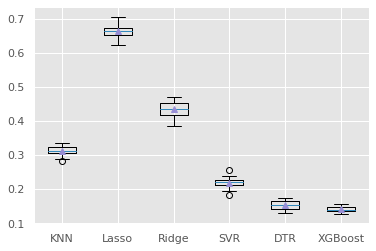

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_clv(customer_mixed_df)
models = get_models(knn_regressor,lasso, ridge, svr, Cart,xgb_model)
  # evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    start = time.time()
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print('Time Taken :' + str(round(start - time.time(),2) * -1))
    print('R2 score = ' + str(r2_score(y_test,predictions)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

print ()

## 8.2) Feature Selection

In [ ]:
#Feature Selection technique on whole df 
custer_x_no_labels = customer_mixed_df.drop(columns=['Cluster'])
X_train, X_test, y_train, y_test = get_train_test_clv(custer_x_no_labels)
model = LinearRegression(n_jobs=3)
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)
print("Features Selected")

selected_feat = []
feat_labels = X_train.columns
for feature_list_index in rfe.get_support(indices=True):
    selected_feat.append(feat_labels[feature_list_index])


print(selected_feat)
print(len(selected_feat))
print(len(X_train.columns))

Features Selected
['Coverage', 'Education', 'EmploymentStatus_Employed', 'Vehicle_Four-Door Car Large', 'Vehicle_Four-Door Car Medsize', 'Vehicle_Four-Door Car Small', 'Vehicle_Luxury Car Large', 'Vehicle_Luxury Car Medsize', 'Vehicle_Luxury Car Small', 'Vehicle_Luxury SUV Large', 'Vehicle_Luxury SUV Medsize', 'Vehicle_Luxury SUV Small', 'Vehicle_SUV Small', 'Vehicle_Sports Car Medsize', 'Vehicle_Sports Car Small', 'Vehicle_Two-Door Car Large', 'Vehicle_Two-Door Car Medsize', 'Vehicle_Two-Door Car Small', 'Marital Status_Single', 'Sales Channel_Web', 'State_Arizona', 'State_Nevada', 'Renew Offer Type_Offer1', 'Renew Offer Type_Offer3', 'Monthly Premium Auto', 'Number of Policies']
26
52


## 8.3) Grid search for parameter optimization


### 8.3.1) KNN Regressor

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': [1,5,10,15,20], 'p': [1,2]
}

# P = l1 or l2 norm for absolute or euclidean distance : default l2
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = knn_regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# change here 
grid_search.fit(X_train[selected_feat], y_train)

print(grid_search.best_params_)
Best_KNN = grid_search.best_estimator_

predictions = Best_KNN.predict(X_test[selected_feat])
print('Model Performance KNN Regressor')
print('R2 score = ' + str(r2_score(y_test,predictions)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s finished


{'n_neighbors': 10, 'p': 1}
Model Performance KNN Regressor
R2 score = 0.8853832162904213


### 8.3.2) Decision Tree Regressor


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'ccp_alpha': [0.1,0.001,0.01,0.0001], 'max_depth' : [2,3,4,5,6]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = Cart, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# change here 
grid_search.fit(X_train[selected_feat], y_train)

print(grid_search.best_params_)
Best_TreeR = grid_search.best_estimator_

predictions = Best_TreeR.predict(X_test[selected_feat])
print('Model Performance Decision Tree Rgressor')
print('R2 score = ' + str(r2_score(y_test,predictions)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'ccp_alpha': 0.0001, 'max_depth': 5}
Model Performance Decision Tree Rgressor
R2 score = 0.9242530259218363


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished


### 8.3.3) Support Vector Regression

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear','rbf'], 'C' :[1,5,10,15,20]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# change here # change here 
grid_search.fit(X_train[selected_feat], y_train)

print(grid_search.best_params_)
Best_SVR = grid_search.best_estimator_

predictions = Best_SVR.predict(X_test[selected_feat])
print('Model Performance SVR')
print('R2 score = ' + str(r2_score(y_test,predictions)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.2min finished


{'C': 20, 'kernel': 'rbf'}
Model Performance SVR
R2 score = 0.9160178056175104


### 8.3.4) XGboost Regression Model


In [ ]:
# Create the parameter grid based on the results of random search

param_grid = {
    'learning_rate':[0.001,0.1,1], 'max_depth':[3,4,5,6], 'n_estimators': [50,100,150,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# change here 
grid_search.fit(X_train[selected_feat], y_train)

print(grid_search.best_params_)
Best_XGB = grid_search.best_estimator_

predictions = Best_XGB.predict(X_test[selected_feat])
print('Model Performance XGBoost')
print('R2 score = ' + str(r2_score(y_test,predictions)))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   51.5s finished


[10:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Model Performance XGBoost
R2 score = 0.933991535642134


## 8.4) Running Regression Models with feature selection and optimized parameters 

>KNN 0.224 (0.010)
Time Taken :1.85
R2 score = 0.8853832162904213
>Lasso 0.662 (0.020)
Time Taken :0.21
R2 score = 0.278035554991628
>Ridge 0.437 (0.020)
Time Taken :0.25
R2 score = 0.6269185894361405
>SVR 0.168 (0.010)
Time Taken :68.6
R2 score = 0.9160178056175104
>DTR 0.186 (0.010)
Time Taken :0.31
R2 score = 0.9242530259218363
[10:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGBoost 0.148 (0.010)
Time Taken :5.35
R2 score = 0.933991535642134


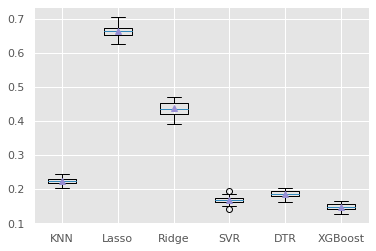

In [ ]:
# Selecting a particular cluster and running the feature selection on it
if ( 'Customer Lifetime Value' not in selected_feat):
  selected_feat.append('Customer Lifetime Value')
X_train, X_test, y_train, y_test = get_train_test_clv(customer_mixed_df.loc[:,selected_feat])
# get the models to evaluate

models = get_models(Best_KNN, lasso, ridge, Best_SVR, Best_TreeR,Best_XGB)
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    start = time.time()
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print('Time Taken :' + str(round(start - time.time(),2) * -1))
    print('R2 score = ' + str(r2_score(y_test,predictions)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()
print ()

## 8.5) Comparing Regression Models

**Regression Model Summary - Without Feature Selection**

||Time Taken (s)|r^2| Mean Square Error | Standard Deviation of Square Error |
|-|-|-|-|-|
|KNN|6.61|0.7983|0.312|0.013|
|Lasso|0.37|0.2780|**0.662**|0.020|
|Ridge|0.40|0.6388|**0.435**|0.021|
|SVR|33.82|0.8645|0.219|0.014|
|DTR|1.53|0.8770|0.152|0.013|
|XGBoost|14.29|0.9379|0.142|0.008|



**Regression Model Summary - With Feature Selection**

||Time Taken (s)|r^2| Mean Square Error | Standard Deviation of Square Error|
|-|-|-|-|-|
|KNN|1.86|0.8854|0.224|0.010|
|Lasso|0.21|0.2780|**0.662**|0.020|
|Ridge|0.25|0.6269|**0.437**|0.020|
|SVR|69.1|0.9160|0.168|0.010|
|DTR|0.32|0.9243|0.186|0.010|
|XGBoost|5.4|0.9340|0.148|0.010|



As seen in the above graph, Lasso regression and Ridge regression has significantly higher MSE than the other non-linear models. This suggests that our data is **not linear**.

As such, we our group will create a stacking ensemble using KNN, DTR and SVR, the lower performing non-linear regression models to compare against the XGBoost Regressor, a pre-built ensemble.


## 8.5) Evaluating Regression Model on each Cluster

Evaluating Each model using Cross Validation w/ performance Graph

Cluster 0
[10:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGB 0.166 (0.016)
Time Taken :1.39
R2 score = 0.9197550741795425

>Stacking Ensemble 0.184 (0.013)
Time Taken :18.78
R2 score = 0.9151526347897296



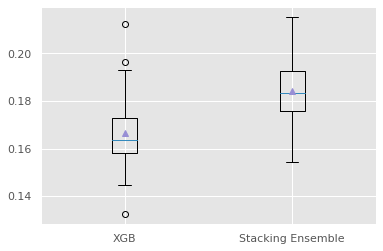


Cluster 1
[10:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGB 0.034 (0.003)
Time Taken :1.45
R2 score = 0.9911063284603987

>Stacking Ensemble 0.045 (0.004)
Time Taken :8.1
R2 score = 0.9877873689207647



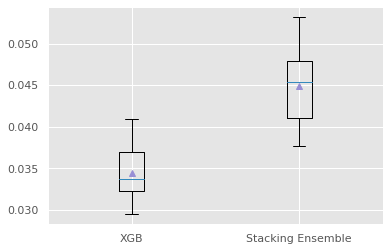


Cluster 2
[10:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGB 0.180 (0.020)
Time Taken :2.23
R2 score = 0.8163478344375352

>Stacking Ensemble 0.194 (0.019)
Time Taken :68.38
R2 score = 0.8051314973514212



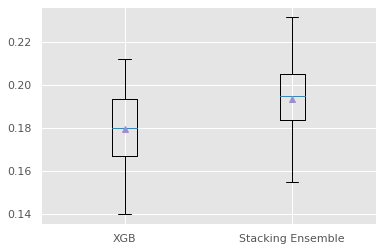


Cluster 3
[10:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>XGB 0.157 (0.022)
Time Taken :1.38
R2 score = 0.934454357942911

>Stacking Ensemble 0.175 (0.021)
Time Taken :18.11
R2 score = 0.9246322385509385



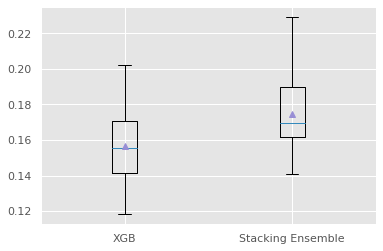

In [ ]:
# Selecting a particular cluster and running the feature selection on it 
for i in range(4):
  print ('Cluster', i)
  custer_x_labels = customer_mixed_df.loc[customer_mixed_df['Cluster'] == i]
  custer_x_no_labels = custer_x_labels.drop(columns=['Cluster'])
  X_train, X_test, y_train, y_test = get_train_test_clv(custer_x_no_labels.loc[:,selected_feat])
  # get the models to evaluate
  models = dict()
  models['XGB'] = Best_XGB
  models['Stacking Ensemble'] = get_stacking(Best_KNN, Best_TreeR, Best_SVR)
  # evaluate the models and store results
  results, names = list(), list()
  for name, model in models.items():
      start = time.time()
      scores = evaluate_model(model, X_train, y_train)
      results.append(scores)
      names.append(name)
      model.fit(X_train,y_train)
      predictions = model.predict(X_test)
      print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
      print('Time Taken :' + str(round(start - time.time(),2) * -1))
      print('R2 score = ' + str(r2_score(y_test,predictions)))
      print ()
  # plot model performance for comparison
  plt.boxplot(results, labels=names, showmeans=True)
  plt.show()
  print ()

# Conclusion